#Ayo
#hakeim
#Umme
#Lysa 
#Gregoire
#Latoya
#thierno
#Sanaria

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
location = 'https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv'

fp_df = pd.read_csv(location)
fp_df




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Replace all missing values '?'s with numpy nan and 

fp_df.replace('?', np.nan, inplace=True)
fp_df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
fp_df.shape

(101766, 50)

In [ ]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
#show the missing data number
fp_df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
#show the percentage of missing data 
#100*(fp_df.isnull().sum()/len(fp_df))
def missing_values_percent(fp_df):
    nan_percent=100*(fp_df.isnull().sum()/len(fp_df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(fp_df)
nan_percent

diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
race                  2.233555
payer_code           39.557416
medical_specialty    49.082208
weight               96.858479
dtype: float64

Text(0.5, 1.0, 'NaN Data')

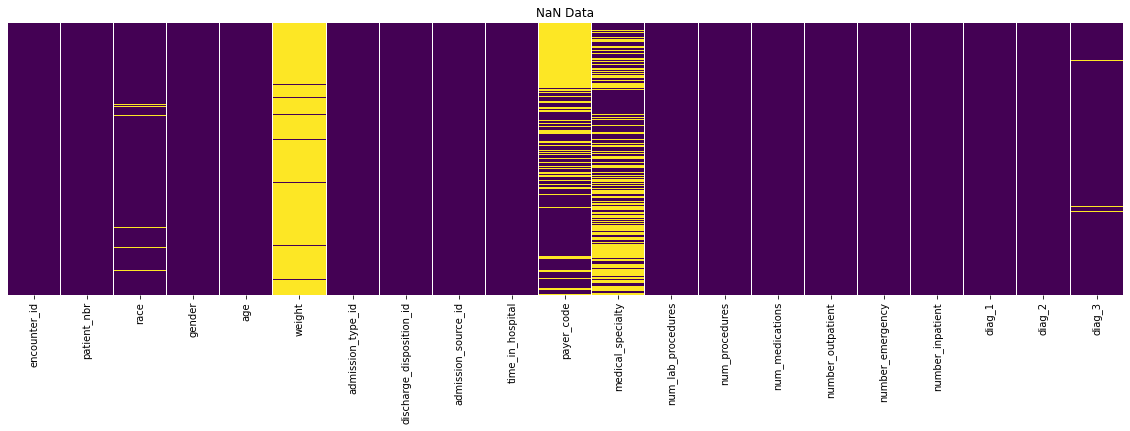

In [ ]:
plt.figure(figsize=(20, 5))
sns.heatmap(fp_df.iloc[:, :-29].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('NaN Data')

In [ ]:
# Get all gender types in the column

fp_df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [ ]:
# Get the number of 'Unknown/Invalid' rows

len(fp_df.loc[fp_df['gender'] == 'Unknown/Invalid'])

3

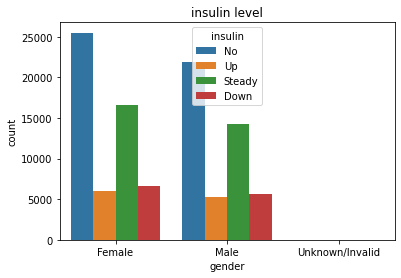

In [ ]:

# Visualize readmission rate and gender

sns.countplot(x='gender', data=fp_df, hue='insulin')
plt.title('insulin level')
plt.show()

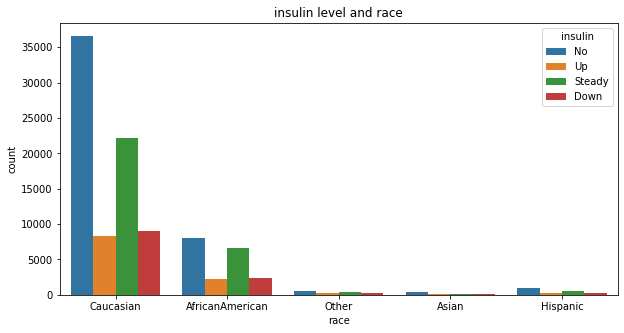

In [ ]:
# Visualize insulin level and race

plt.figure(figsize=(10, 5))
sns.countplot(x='race', data=fp_df, hue='insulin')
plt.title('insulin level and race')
plt.show()

Droping columns to have a cleaner table

In [ ]:
# Drop everything except [race, redmitted, gender, insulin, age, time_in_hospital]
df1 = fp_df.copy()
# df1.drop(columns=['admission_type_id','discharge_disposition_id', 'admission_source_id','num_lab_procedures', 'num_procedures', 'num_medications',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1','diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
#        'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone','rosiglitazone', 'change', 'diabetesMed'
# ], inplace=True)

df1.drop(columns=['patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
], inplace=True)



df1

,encounter_id,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),NaN,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),NaN,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),NaN,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),NaN,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),NaN,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),NaN,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,AfricanAmerican,Female,[80-90),NaN,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,Caucasian,Male,[70-80),NaN,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,Caucasian,Female,[80-90),NaN,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df1.columns

Index(['encounter_id', 'race', 'gender', 'age', 'weight', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
# df1.drop(columns=[
#                   'encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 
#                   'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'acetohexamide', 'tolbutamide'
# ], inplace=True)

# df1

df1.drop(columns=[
                  'weight', 'payer_code', 'medical_specialty', 'A1Cresult'
], inplace=True)

df1

,encounter_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,Caucasian,Female,[0-10),1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,250.13,291,458,9,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,560,276,787,9,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,Caucasian,Male,[70-80),1,53,0,9,1,0,0,38,590,296,13,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,Caucasian,Female,[80-90),10,45,2,21,0,0,1,996,285,998,9,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Setup dummy values for columns

# df1.loc[:, 'insulin', 'metformin', 'metformin-pioglitazone'] = df1.loc[:, ('insulin', 'metformin', 'metformin-pioglitazone'].replace(
#     {
#         'No': 0,
#        'Up': 1,
#        'Down': 2,
#      'Steady' : 3
#     }
# )


df1.loc[:, 'race'] = df1.loc[:, 'race'].replace(
    {
        'Caucasian': 0,
       'Asian': 1,
       'AfricanAmerican': 2,
     'Hispanic': 3,
     'Other': 4
    }
)

df1.loc[:, 'gender'] = df1.loc[:, 'gender'].replace(
    {
        'Female': 0,
       'Male': 1
    }
)

df1.loc[:, 'age'] = df1.loc[:, 'age'].replace(
    {
        '[0-10)': 0,
       '[10-20)': 1,
       '[20-30)': 2,
     '[30-40)' : 3,
        '[40-50)': 4,
       '[50-60)': 5,
       '[60-70)': 6,
     '[70-80)' : 7,
     '[80-90)' : 8,
     '[90-100)' : 9,
    }
)

df1.loc[:, 'diabetesMed'] = df1.loc[:, 'diabetesMed'].replace(
    {
        'No': 0,
       'Yes': 1
    }
)

df1.loc[:, 'change'] = df1.loc[:, 'change'].replace(
    {
        'No': 0,
       'Ch': 1
    }
)

# Split 'readmitted' into two classes: readmit within 30 days 1 or not 0 
df1.loc[:, 'readmitted'] = df1.loc[:, 'readmitted'].replace( { 'NO': 0, '>30': 0, '<30': 1 } ) 

df1.loc[:, 'max_glu_serum'] = df1.loc[:, 'max_glu_serum'].replace(
{'None': 0,
'Norm': 100,
'>300': 300,
'>200': 200}
)

# Replace 'E' and 'V' to '-' 
cols = ['diag_1', 'diag_2', 'diag_3'] 
for col in cols: 
  df1.loc[:, col] = df1.loc[:, col].str.replace('E', '-') 
  df1.loc[:, col] = df1.loc[:, col].str.replace('V', '-')


# Print distinct values in each medication column 
def get_meds(frame): 
  col_ls = list(frame.columns) 
  start = col_ls.index('metformin') 
  end = col_ls.index('metformin-pioglitazone') + 1 
  return start, end 

#Print cols
start, end = get_meds(df1) 
for col in df1.iloc[:, start:end].columns: 
  print(df1[col].unique()) 


# Format remaining medication columns (21 to 40)
start, end = get_meds(df1) 
for col in df1.iloc[:, start:end].columns: 
  df1.loc[:, col] = df1.loc[:, col].replace( {'No' : -20, 'Down' : -10, 'Steady': 0, 'Up':10})



df1

['No' 'Steady' 'Up' 'Down']
['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Up' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady' 'Up']
['No']
['No']
['No' 'Up' 'Steady' 'Down']
['No' 'Steady' 'Down' 'Up']
['No' 'Steady']
['No' 'Steady']
['No' 'Steady']
['No' 'Steady']


,encounter_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,0.0,0,0,1,41,0,1,0,0,0,250.83,NaN,NaN,1,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,0,0
1,149190,0.0,0,1,3,59,0,18,0,0,0,276,250.01,255,9,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0
2,64410,2.0,0,2,2,11,5,13,2,0,1,648,250,-27,6,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,1,0
3,500364,0.0,1,3,2,44,1,16,0,0,0,8,250.43,403,7,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0
4,16680,0.0,1,4,1,51,0,8,0,0,0,197,157,250,5,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,2.0,1,7,3,51,0,16,0,0,0,250.13,291,458,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-10,-20,-20,-20,-20,-20,1,1,0
101762,443847782,2.0,0,8,5,33,3,18,0,0,1,560,276,787,9,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,0,1,0
101763,443854148,0.0,1,7,1,53,0,9,1,0,0,38,590,296,13,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-10,-20,-20,-20,-20,-20,1,1,0
101764,443857166,0.0,0,8,10,45,2,21,0,0,1,996,285,998,9,0,-20,-20,-20,-20,-20,-20,0,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0


In [ ]:
# # Drop missing values
df1.dropna(axis=0)
# # Drop the 3 'Unknown/Invalid' entries in gender 
df1.drop(df1.loc[df1['gender'] == 'Unknown/Invalid'].index, inplace = True) 


df1.dropna(axis=0, inplace=True)

df1

,encounter_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,0.0,0,1,3,59,0,18,0,0,0,276,250.01,255,9,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0
2,64410,2.0,0,2,2,11,5,13,2,0,1,648,250,-27,6,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,1,0
3,500364,0.0,1,3,2,44,1,16,0,0,0,8,250.43,403,7,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0
4,16680,0.0,1,4,1,51,0,8,0,0,0,197,157,250,5,0,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,1,1,0
5,35754,0.0,1,5,3,31,6,16,0,0,0,414,411,250,9,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,2.0,1,7,3,51,0,16,0,0,0,250.13,291,458,9,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-10,-20,-20,-20,-20,-20,1,1,0
101762,443847782,2.0,0,8,5,33,3,18,0,0,1,560,276,787,9,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,0,-20,-20,-20,-20,-20,0,1,0
101763,443854148,0.0,1,7,1,53,0,9,1,0,0,38,590,296,13,0,0,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-20,-10,-20,-20,-20,-20,-20,1,1,0
101764,443857166,0.0,0,8,10,45,2,21,0,0,1,996,285,998,9,0,-20,-20,-20,-20,-20,-20,0,-20,-20,0,-20,-20,-20,-20,-20,-20,-20,10,-20,-20,-20,-20,-20,1,1,0


Observation of the rate of diabetic on the population

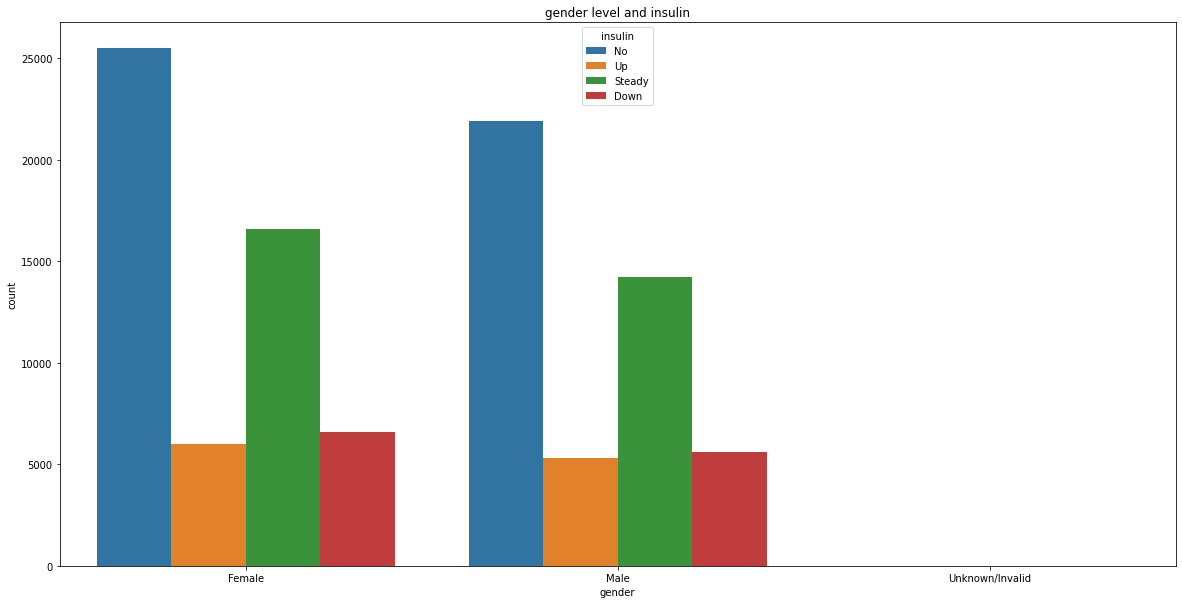

In [ ]:
#Insulin level according to gender.
plt.figure(figsize=(20, 10))
sns.countplot(x='gender', data=fp_df, hue='insulin')
plt.title('gender level and insulin')
plt.show()

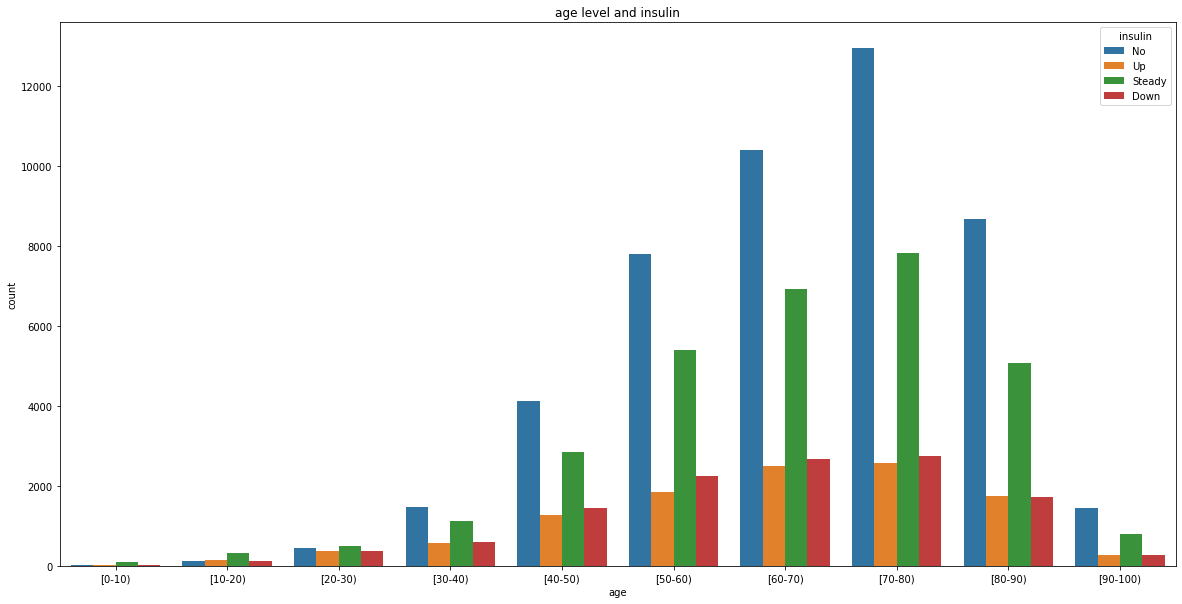

In [ ]:
#Insulin level according to age.

plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=fp_df, hue='insulin')
plt.title('age level and insulin')
plt.show()

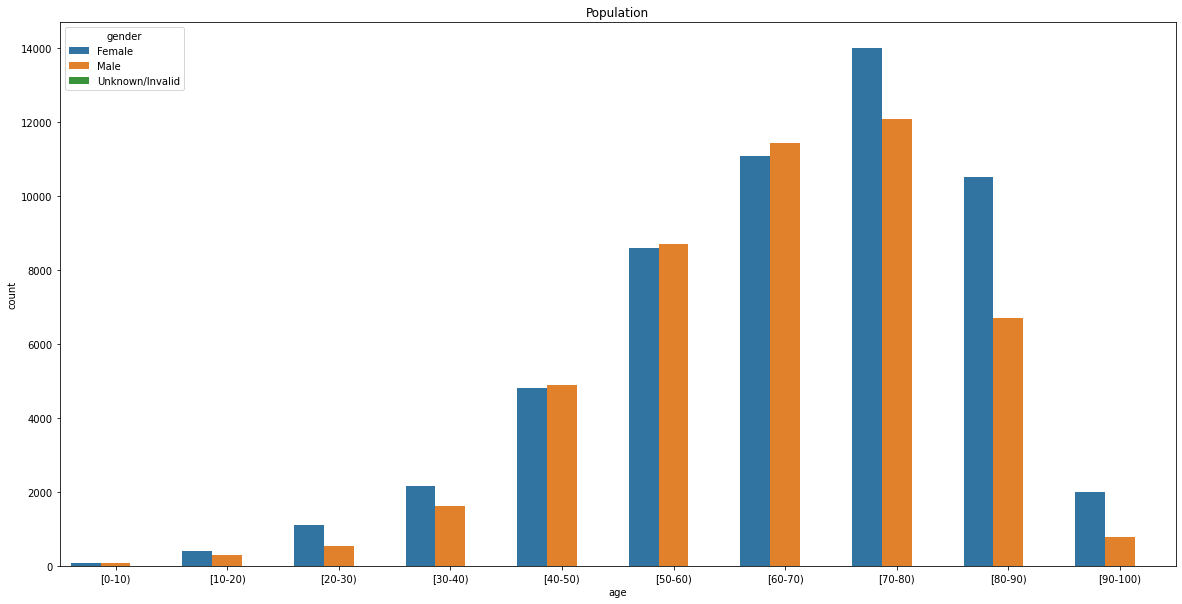

In [ ]:
#Insulin level according to age.

plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=fp_df, hue='gender')
plt.title('Population')
plt.show()

## Logistic regression

In [ ]:


# Create X (all columns except target)
X = df1.drop('readmitted', axis=1)

# Create y (only the target column)
y = df1.loc[:, 'readmitted']

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

# View the different shapes of the training and test datasets

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((73539, 41), (24513, 41), (73539,), (24513,))

In [ ]:
#Import LogisticRegression from sklearn's linear_model
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression as log
log = LogisticRegression(solver='liblinear',random_state=88)


# Fit the LogisticRegression to the training data

log.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data and
# store the predictions to a variable called predict

predict = log.predict(X_test)

log.score(X_test, y_test)


0.88679476196304

In [ ]:
# Import confusion_matrix from sklearn's metrics module
from sklearn.metrics import confusion_matrix

# # Fit the test labels and predictions into confusion_matrix and
# print the matrix
print(confusion_matrix(y_test, predict))


[[21738     0]
 [ 2775     0]]


In [ ]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True,
                     cmap='GnBu')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")


Text(0.5, 1.0, 'Logistic Regression \n Accuracy 0.89\n')

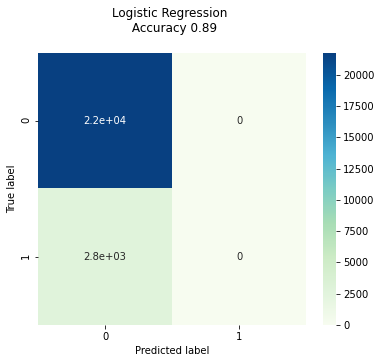

In [ ]:
# Call plot_conf_mat with the test labels and predictions
plot_conf_mat(y_test, predict)


# Give the matrix a title
score = round(log.score(X_test, y_test), 2)
plt.title(f'Logistic Regression \n Accuracy {score}\n')


##Classification Report

In [ ]:
# Import classification_report from sklearn's metrics module
from sklearn.metrics import classification_report

# Fit the test labels and predictions into classification_report and
# print the report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21738
           1       0.00      0.00      0.00      2775

    accuracy                           0.89     24513
   macro avg       0.44      0.50      0.47     24513
weighted avg       0.79      0.89      0.83     24513



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


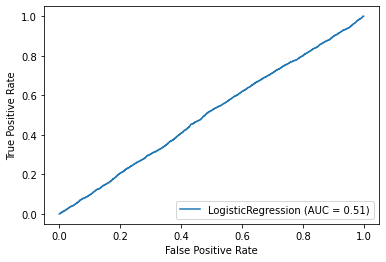

In [ ]:
# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

# Plot a ROC curve using our current model using plot_roc_curve
plot_roc_curve(log, X_test, y_test)


##Confusion matrix

In [ ]:
# Import confusion_matrix from sklearn's metrics module
from sklearn.metrics import confusion_matrix

# # Fit the test labels and predictions into confusion_matrix and
# print the matrix
print(confusion_matrix(y_test, predict))

[[21738     0]
 [ 2775     0]]


Text(0.5, 1.0, 'Accuracy Score: 0.88679476196304')

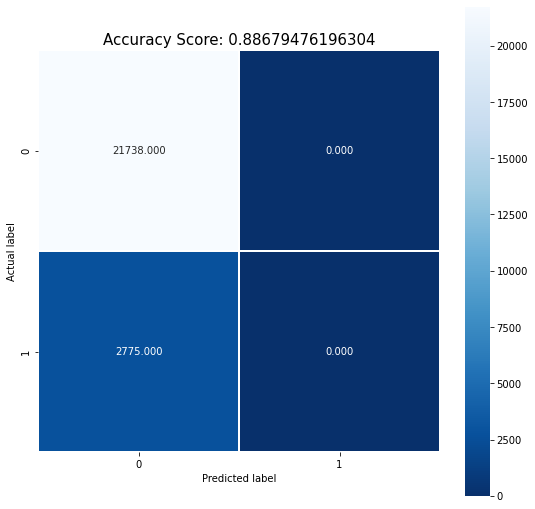

In [ ]:
# # Make confusion matrix more visual
# def plot_conf_mat(y_test, y_preds):
#     """
#     Plots a confusion matrix using Seaborn's heatmap().
#     """
#     fig, ax = plt.subplots(figsize=(6, 5))
#     ax = sns.heatmap(confusion_matrix(y_test, y_preds),
#                      annot=True, # Annotate the boxes
#                      cbar=True,
#                      cmap='GnBu')
#     plt.xlabel("Predicted label")
#     plt.ylabel("True label")
    
#     # Call plot_conf_mat with the test labels and predictions
# plot_conf_mat(y_test, predict)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(log.score(X_test, y_test)) 
plt.title(all_sample_title, size = 15)

In [ ]:
# Import classification_report from sklearn's metrics module
from sklearn.metrics import classification_report

# Fit the test labels and predictions into classification_report and
# print the report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21738
           1       0.44      0.02      0.04      2775

    accuracy                           0.89     24513
   macro avg       0.67      0.51      0.49     24513
weighted avg       0.84      0.89      0.84     24513



##

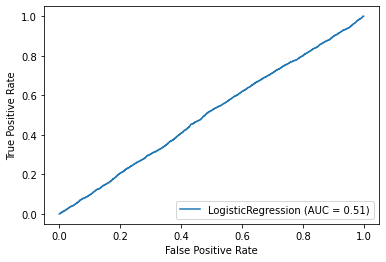

In [ ]:
# Import plot_roc_curve from sklearn's metrics module 
from sklearn.metrics import plot_roc_curve 

# Plot a ROC curve using our current model using plot_roc_curve 
plot_roc_curve(log, X_test, y_test) 

##K-Neighbor

In [ ]:
# Import StandardScaler from sklearn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler as scaler
scaler = StandardScaler()

# Fit the StandardScaler to the features
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Import KNeighborsClassifier frrom sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier 

[0.18810427120303513, 0.12152735283319055, 0.11491861461265451, 0.11345000611920206, 0.11300126463509158]


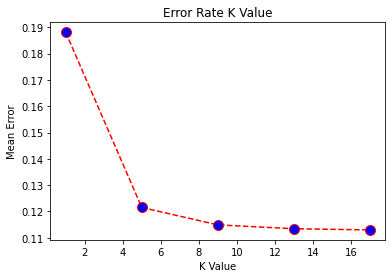

In [ ]:
# # Calculate error for K values between 1 and 19 step 4
error = []

for i in range(1, 20, 4):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

print(error)

# Visulaize the relationship between error rate and k value
# plt.figure(figsize=(12, 6))
plt.plot(range(1, 20, 4), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show() 

In [ ]:
# Create an instance of KNeighborsClassifier as knc
knc = KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Fit the KNeighborsClassifier to the training data

knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
# Use the fitted model to make predictions on the test data and
# store the predictions to a variable called pred

pred = knc.predict(X_test)

In [ ]:
knc_score = knc.score(X_test, y_test)
print(knc_score)

0.8862644311181822


In [ ]:
# # Fit the test labels and predictions into confusion_matrix and
# print the matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[21674    64]
 [ 2724    51]]


In [ ]:
# Create a data frame with the models perfoamnce metrics
models_scores_table = pd.DataFrame({'Logistic Regression':[0.89,0.79,0.89,0.83,0.51],
                                           'K-Nearest Neighbors':[0.89,0.84,0.89,0.84,0.51],},
                                         index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)


In [ ]:

models_scores_table

,Logistic Regression,K-Nearest Neighbors,Best Score
Accuracy,0.89,0.89,Logistic Regression
Precision,0.79,0.84,K-Nearest Neighbors
Recall,0.89,0.89,Logistic Regression
F1 Score,0.83,0.84,K-Nearest Neighbors
AUC,0.51,0.51,Logistic Regression


# **Conclusion**
In conclusion we used variables of  age, gender, race, insulin, readmitted and medications to ascertain the levels within the groups of insulin level. Our team used Logistic Regression and KNN to give the accuracy of our tested sample data.
Our observations concluded that KNN is a better fit using regression
The best result than the logistic regression on the training models.
